In [73]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import os

def find_file_with_id(file_id,root_dir='../results'):
    """Find a file containing the given ID in the results directory structure"""
    for dirpath, dirnames, filenames in os.walk(root_dir):
        for filename in filenames:
            if file_id in filename:
                # Return path relative to current directory
                return os.path.relpath(os.path.join(dirpath, filename))
    return None

file_path = find_file_with_id(file_id='76963')
print(file_path)

# Open the .h5 file in read mode
with h5py.File(file_path, 'r') as file:
    # Print the names of the groups/datasets in the file
    print("Keys in the file:", list(file.keys()))
    
    # Assuming there's a dataset named 'data' in the file
    # Modify this part according to your file's structure
    data = file['datasets']
    print(file['datasets'].keys())

    print(file['archive'].keys())
    #print(file['archive']['__param__SDF'].keys())

    print(file['expid'][()])
            
    rabi_t= data['beta_index'][:]
    pmt_count=data['pmt_counts_avg_thresholded'][:]

# file_path = find_file_with_id(file_id='76394')
# print(file_path)

# # Open the .h5 file in read mode
# with h5py.File(file_path, 'r') as file:
#     # Print the names of the groups/datasets in the file
#     print("Keys in the file:", list(file.keys()))
    
#     # Assuming there's a dataset named 'data' in the file
#     # Modify this part according to your file's structure
#     data = file['datasets']
#     print(file['datasets'].keys())

#     print(file['archive'].keys())
#     #print(file['archive']['__param__SDF'].keys())

#     print(file['expid'][()])
            
#     rabi_t= data['beta_index'][:]
#     pmt_count_back=data['pmt_counts_avg_thresholded1'][:]


# for i in range(len(pmt_count)):
#     if pmt_count[i]==0:
#         pmt_count[i]=np.nan

# for i in range(len(pmt_count)):
#     if np.isnan(pmt_count[i]):
#         if not np.isnan(pmt_count_back[i]):
#             pmt_count[i]=pmt_count_back[i]
#         else:
#             pmt_count[i]=0
#     else:
#         if not np.isnan(pmt_count_back[i]):
#             pmt_count[i]=pmt_count_back[i]/2+pmt_count[i]/2
#         else:
#             pmt_count[i]=pmt_count[i]


plt.figure()
plt.plot(rabi_t, pmt_count)
plt.scatter(rabi_t, pmt_count,c='red',s=20)
plt.xlabel('${\\rm t}(\mu s)$')
plt.ylabel('<z>')


In [75]:
pmt_count=pmt_count.reshape(int(np.sqrt(len(pmt_count))),int(np.sqrt(len(pmt_count))))

In [76]:
eta1=0.134#0.134#0.094246#0.071655#0.094246#0.071655#0.094246
#0.134/np.sqrt(2)
#0.134/np.sqrt(2)
print(eta1)
eta2=0.134# 0.134#0.071655#0.094246#0.071655#0.094246#0.071655#
#0.134/np.sqrt(2)*np.sqrt(0.526/0.901)

Rabi_readout1=0.09*2*np.pi
Rabi_readout2=0.09*2*np.pi
beta_time_range_us1 = 30
beta_time_range_us2 = 30

beta_range1=eta1*Rabi_readout1*beta_time_range_us1
beta_range2=eta2*Rabi_readout2*beta_time_range_us2
print(beta_range1, beta_range2)

0.134
2.2732564441375747 2.2732564441375747


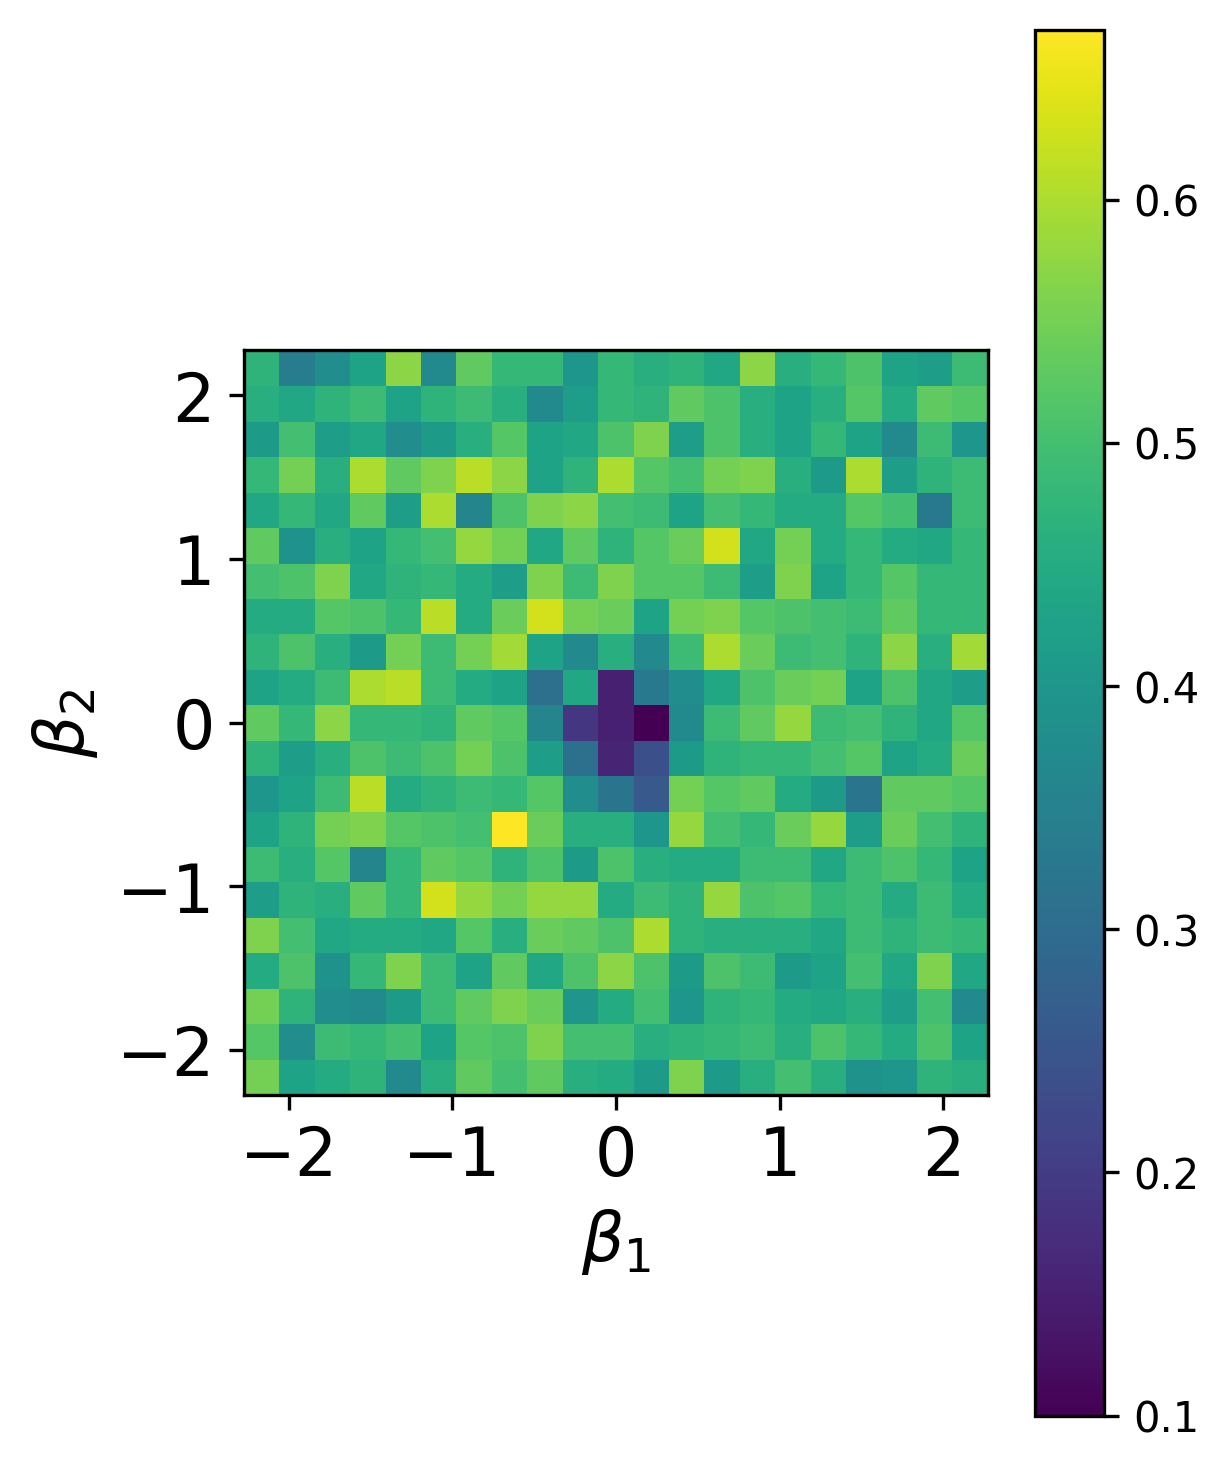

In [77]:
import matplotlib.colors as mcolors
cmap = plt.cm.viridis  # You can choose any colormap
cmap = cmap.copy()     # Copy the colormap to modify it
cmap.set_bad(color='gray')  # Set NaN values to gray

# pmt_count=pmt_count/2+pmt_count.T/2

plt.figure(figsize=(4,6), dpi=300)

for i in range(len(pmt_count)):
    for j in range(len(pmt_count[i])):
        if pmt_count[i][j]==0 or np.isnan(pmt_count[i][j]):
            if i>0 and i<len(pmt_count)-1 and j>0 and j<len(pmt_count[i])-1:
                pmt_count[i][j]=(pmt_count[i][j-1]+pmt_count[i][j+1]+pmt_count[i-1][j]+pmt_count[i+1][j])/4
            elif i==0 and j>0 and j<len(pmt_count[i])-1:
                pmt_count[i][j]=(pmt_count[i][j-1]+pmt_count[i][j+1]+pmt_count[i+1][j])/3
            elif i==len(pmt_count)-1 and j>0 and j<len(pmt_count[i])-1:
                pmt_count[i][j]=(pmt_count[i][j-1]+pmt_count[i][j+1]+pmt_count[i-1][j])/3
            elif j==0 and i>0 and i<len(pmt_count)-1:
                pmt_count[i][j]=(pmt_count[i][j+1]+pmt_count[i-1][j]+pmt_count[i+1][j])/3
            elif j==len(pmt_count[i])-1 and i>0 and i<len(pmt_count)-1:
                pmt_count[i][j]=(pmt_count[i][j-1]+pmt_count[i-1][j]+pmt_count[i+1][j])/3
            elif i==0 and j==0:
                pmt_count[i][j]=(pmt_count[i][j+1]+pmt_count[i+1][j])/2
            elif i==0 and j==len(pmt_count[i])-1:
                pmt_count[i][j]=(pmt_count[i][j-1]+pmt_count[i+1][j])/2
            elif i==len(pmt_count)-1 and j==0:  
                pmt_count[i][j]=(pmt_count[i][j+1]+pmt_count[i-1][j])/2
            elif i==len(pmt_count)-1 and j==len(pmt_count[i])-1:
                pmt_count[i][j]=(pmt_count[i][j-1]+pmt_count[i-1][j])/2
            elif i==0 and j==0:
                pmt_count[i][j]=(pmt_count[i][j+1]+pmt_count[i+1][j])/2
            elif i==0 and j==len(pmt_count[i])-1:
                pmt_count[i][j]=(pmt_count[i][j-1]+pmt_count[i+1][j])/2


plt.imshow(pmt_count, cmap=cmap, extent=[-beta_range1,beta_range1,-beta_range2,beta_range2])#, aspect=beta_range1/beta_range2)
plt.xlabel('$\\beta_1$',fontsize=16)
plt.ylabel('$\\beta_2$',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.colorbar()

In [78]:
from scipy.ndimage import zoom


def interpolate_2d(data, upscale_factor=2, method='bicubic', padding=0):
    if method == 'bilinear':
        order = 1
    elif method == 'bicubic':
        order = 3
    else:
        raise ValueError("Invalid method. Choose 'bilinear' or 'bicubic'.")
    
    interpolated_data = zoom(data, zoom=upscale_factor, order=order)
    
    if padding > 0:
        interpolated_data = np.pad(interpolated_data, pad_width=padding, mode='constant', constant_values=0.5)
    
    return interpolated_data

pmt_count[-1]=pmt_count[1]
pmt_interpolate=interpolate_2d(pmt_count, upscale_factor=1)

In [79]:
L=len(pmt_interpolate)
offset=(np.sum(pmt_interpolate)-np.sum(pmt_interpolate[L//6:L*5//6, L//6:L*5//6]))/(L*L-(L*5//6-L//6)**2)
offset-=0.00
print(offset)

0.4720408163265306


Text(0.5, 1.0, 'symmetric')

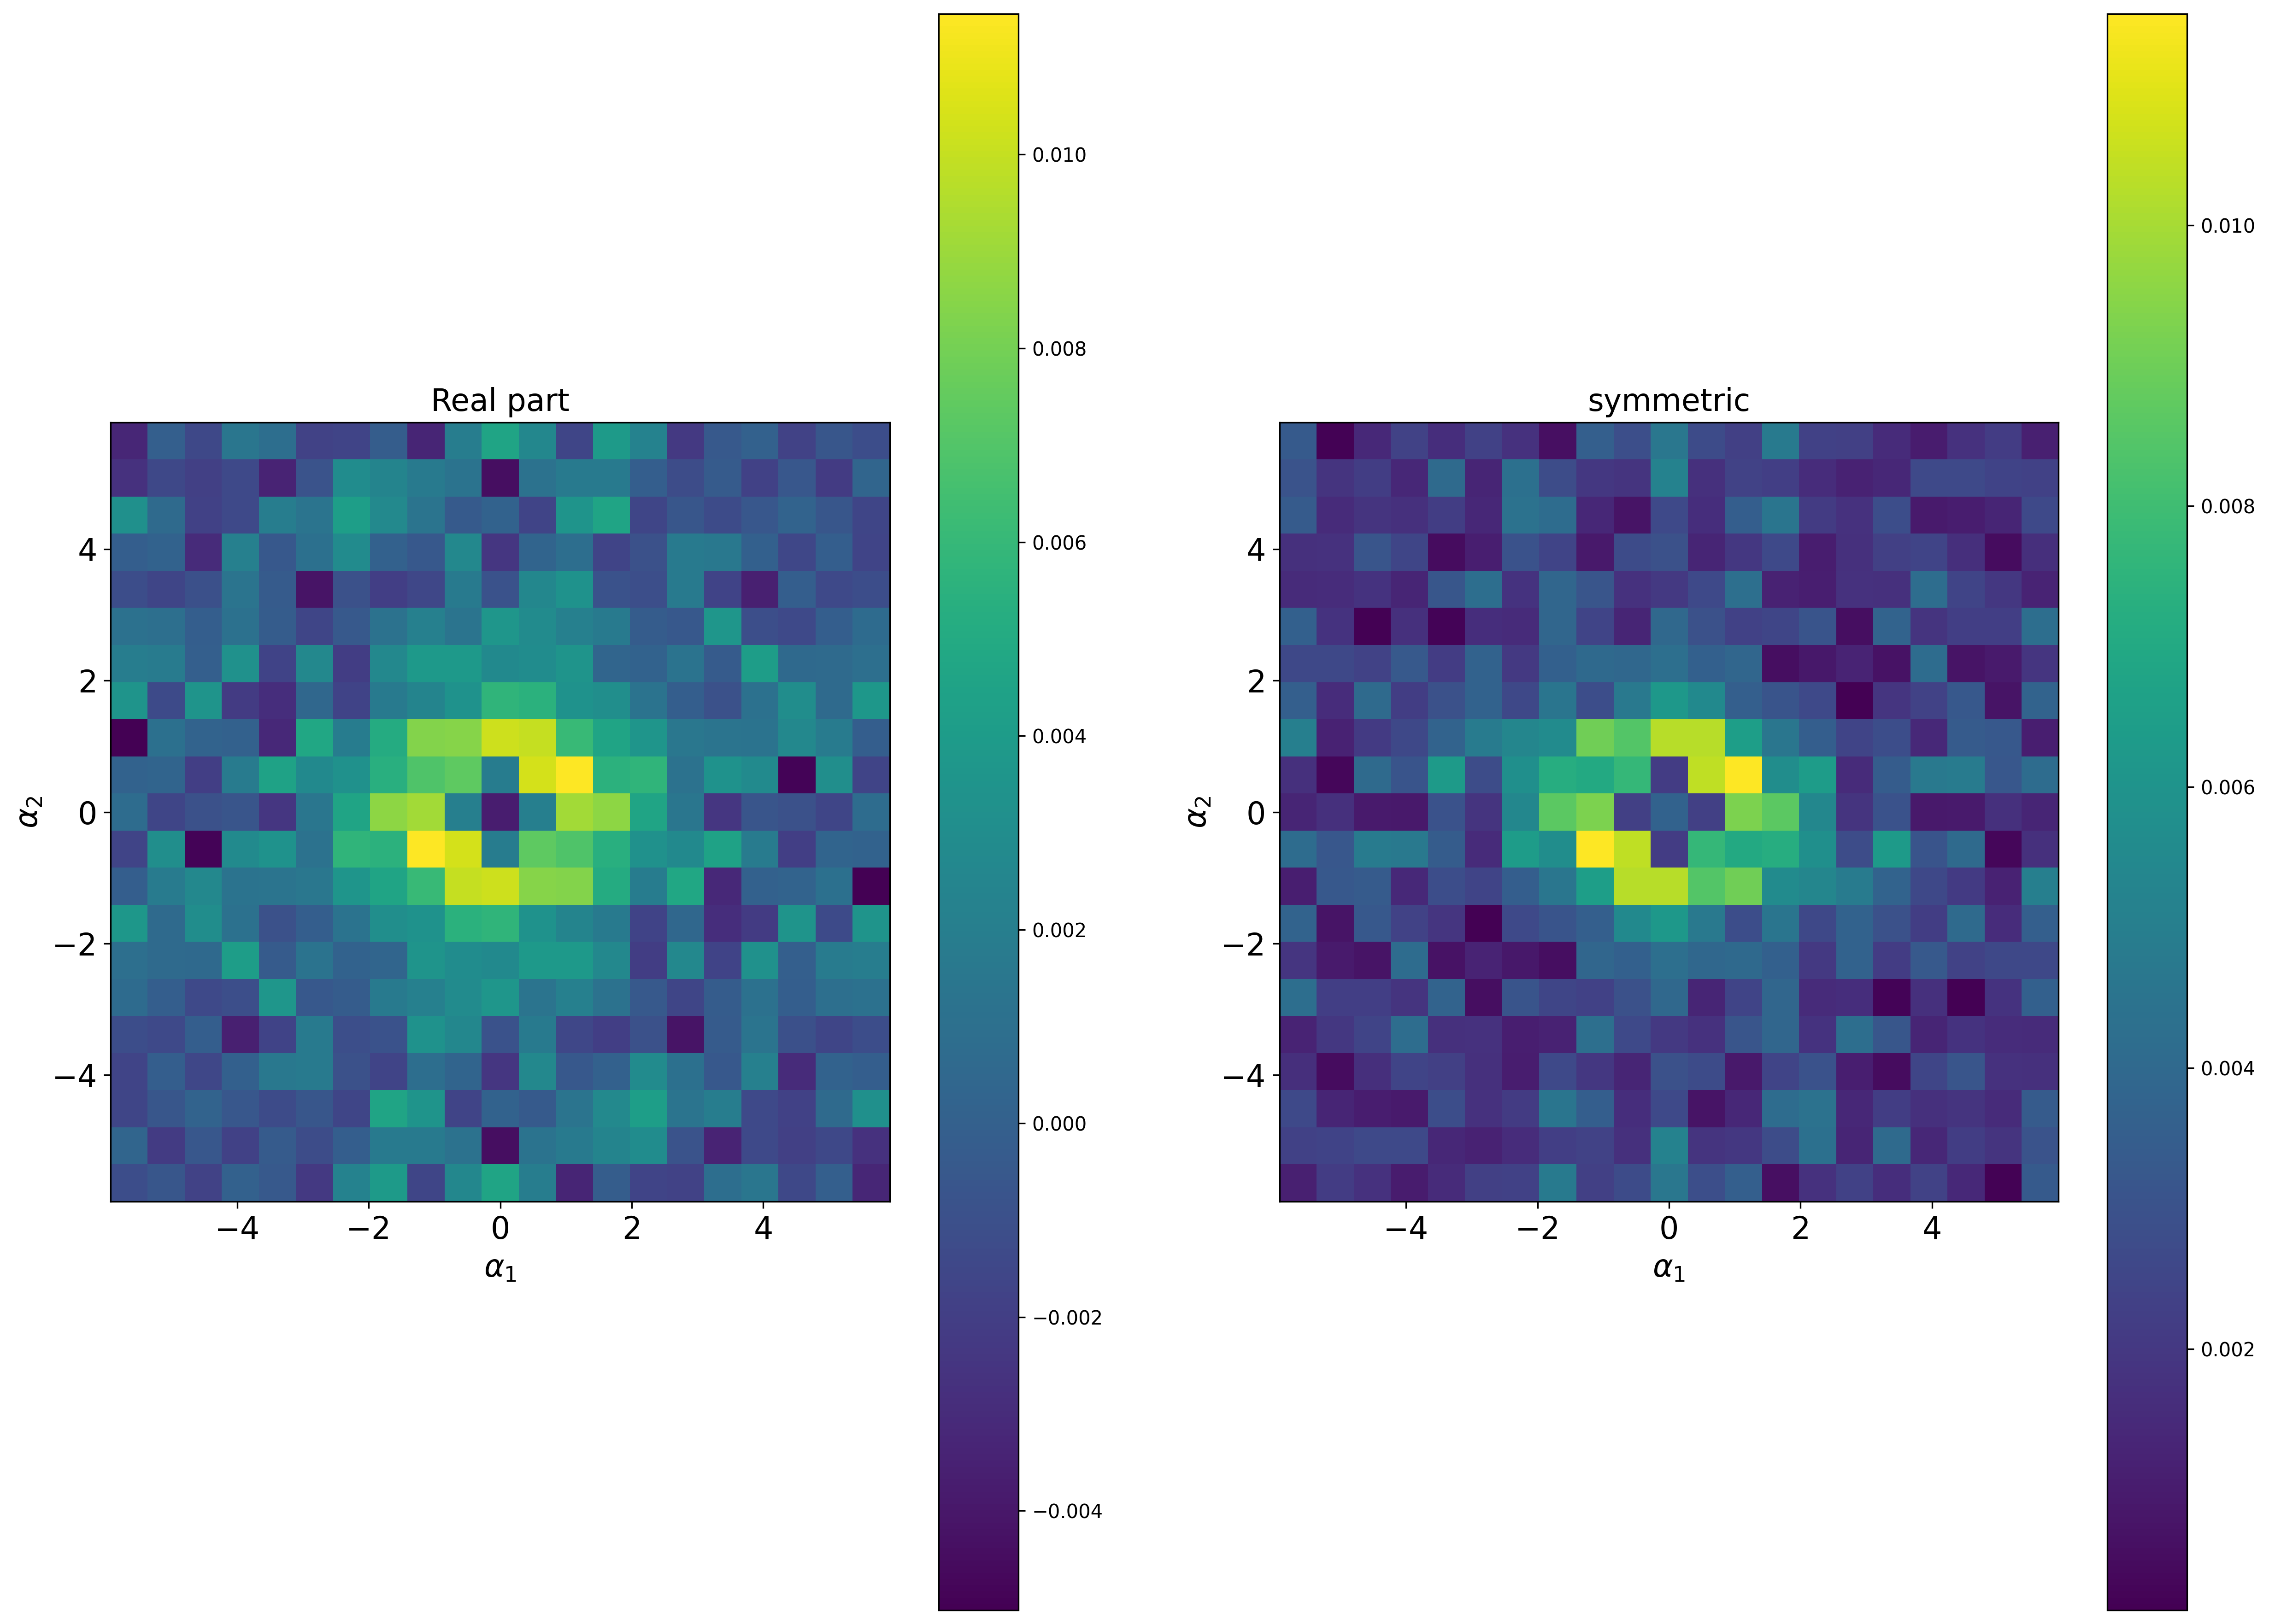

In [80]:
#pmt_count_tmp=pmt_count.copy()
pmt_count_tmp=pmt_interpolate.copy()

pmt_count_tmp=np.nan_to_num(pmt_count_tmp, nan=0)

#padding
pmt_padding =np.pad(pmt_count_tmp-offset, pad_width=0, mode='constant', constant_values=0.)

#shift the data to the center
pmt_padding_shift=np.zeros((len(pmt_padding),len(pmt_padding)))
pmt_padding_shift[len(pmt_padding)//2+1:,len(pmt_padding)//2+1:]=pmt_padding[:len(pmt_padding)//2,:len(pmt_padding)//2]
pmt_padding_shift[:len(pmt_padding)//2+1,:len(pmt_padding)//2+1]=pmt_padding[len(pmt_padding)//2:,len(pmt_padding)//2:]
pmt_padding_shift[:len(pmt_padding)//2+1,len(pmt_padding)//2+1:]=pmt_padding[len(pmt_padding)//2:,:len(pmt_padding)//2]
pmt_padding_shift[len(pmt_padding)//2+1:,:len(pmt_padding)//2+1]=pmt_padding[:len(pmt_padding)//2,len(pmt_padding)//2:]

# Apply Gaussian window to data before FFT
sigma = 20# Width of Gaussian window
x = np.linspace(0, len(pmt_padding), len(pmt_padding))
y = np.linspace(0, len(pmt_padding), len(pmt_padding))
X, Y = np.meshgrid(x, y)
gaussian = np.exp(-(X**2 + Y**2)/(2*sigma**2))
gaussian = gaussian / gaussian.sum()  # Normalize

# Multiply data by window function then take FFT
chi_transformed = np.fft.fft2(pmt_padding_shift * gaussian)

# chi = chi_transformed
fft_tmp = np.fft.fftshift(chi_transformed)
#np.fft.fftshift(np.fft.fft2(pmt_padding_shift))


alpha_axis1=np.fft.fftshift(np.fft.fftfreq(len(pmt_padding), 2*np.abs(beta_range1)/(len(pmt_count)-1)))*2*np.sqrt(2) #factors for be consistent with qutip wigner 

alpha_axis2=np.fft.fftshift(np.fft.fftfreq(len(pmt_padding), 2*np.abs(beta_range2)/(len(pmt_count)-1)))*2*np.sqrt(2)


plt.figure(figsize=(20,15), dpi=300)

plt.subplot(121)
plt.imshow(-np.real(fft_tmp), cmap=cmap,  extent=[alpha_axis1[0], alpha_axis1[-1], alpha_axis2[0], alpha_axis2[-1]])
plt.xlabel('$\\alpha_1$',fontsize=16)
plt.ylabel('$\\alpha_2$',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.colorbar()
plt.title('Real part', fontsize=16)

#
plt.subplot(122)
plt.imshow(np.abs(fft_tmp), cmap=cmap,extent=[alpha_axis1[0], alpha_axis1[-1], alpha_axis2[0], alpha_axis2[-1]])
plt.xlabel('$\\alpha_1$',fontsize=16)
plt.ylabel('$\\alpha_2$',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.colorbar()
plt.title('symmetric', fontsize=16)




In [81]:
eta1*0.078*120/2*2*np.pi

3.9403111698384627